# Mask R-CNN 
+ 이번 과정은 Object Detection 과정으로 Mask R-CNN에 대해 간략하게 배워 보겠습니다.
+ 우리가 여기서 Mask R-CNN 코딩하는것이 아니라 이미 잘하시는분이 만들어 놓은 코딩을 가지고 
+ 모델이 어떻게 Object Detect를 하는지에 대한 사용법을 배우겠습니다.

![좋은것](https://raw.githubusercontent.com/gzone2000/TEMP_TEST/master/maskrcnn_framework.jpg)

### 학습목차

1. tensorflow 2.2.0 버젼 설치 및 필요한 라이브러리 임포트
2. Mask R-CNN 소스 가져오기
3. Running a pre-trained model
 1. Download Model Weights
 2.  Create configuration
 3. Create Model and Load Trained Weights
 4. Coco Dataset Class Names 확인 : 81개의 Class 이름 
 5. Run Object Detection
 6. 사진 한장 올려 Object Detect 해 보자
 7. 비디오 Obejct Detection 하기

## 1. tensorflow 2.2.0 설치 및 필요한 라이브러리 임포트

In [1]:
# Tensorflwo2.2 버젼
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.5 kB/s 
     |████████████████████████████████| 3.0 MB 33.7 MB/s 
     |████████████████████████████████| 454 kB 60.9 MB/s 
     |████████████████████████████████| 2.9 MB 66.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalli

In [2]:
# 필요 패키지 설치
!pip install scikit-image
!pip install imgaug
!pip install pycocotools

## 2. Mask R-CNN 소스 가져오기

In [3]:
#!git clone https://github.com/akTwelve/Mask_RCNN
!git clone https://github.com/leekunhee/Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 983, done.
remote: Total 983 (delta 0), reused 0 (delta 0), pack-reused 983
Receiving objects: 100% (983/983), 136.82 MiB | 33.10 MiB/s, done.
Resolving deltas: 100% (580/580), done.


## 3. Running a pre-trained model

### 1) Download Model Weights

In [4]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
#ROOT_DIR = os.path.abspath("../")
curr_dir = os.getcwd()
ROOT_DIR = curr_dir + '/Mask_RCNN'
COCO_DIR = ROOT_DIR + '/samples/coco'
print(ROOT_DIR)
print(COCO_DIR)

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(COCO_DIR)  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/content/Mask_RCNN
/content/Mask_RCNN/samples/coco
... done downloading pretrained model!


In [5]:
!ls -l ./Mask_RCNN/mask_rcnn_coco.h5

-rw-r--r-- 1 root root 257557808 Feb  4 00:16 ./Mask_RCNN/mask_rcnn_coco.h5


### 2)  Create configuration

In [6]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

### 3)  Create Model and Load Trained Weights

In [7]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### 4) Coco Dataset Class Names 확인
- COCO is a large-scale object detection, segmentation, and captioning dataset
- https://cocodataset.org/#home


In [8]:
# COCO Class names : 81개
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

### 5) Run Object Detection

Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


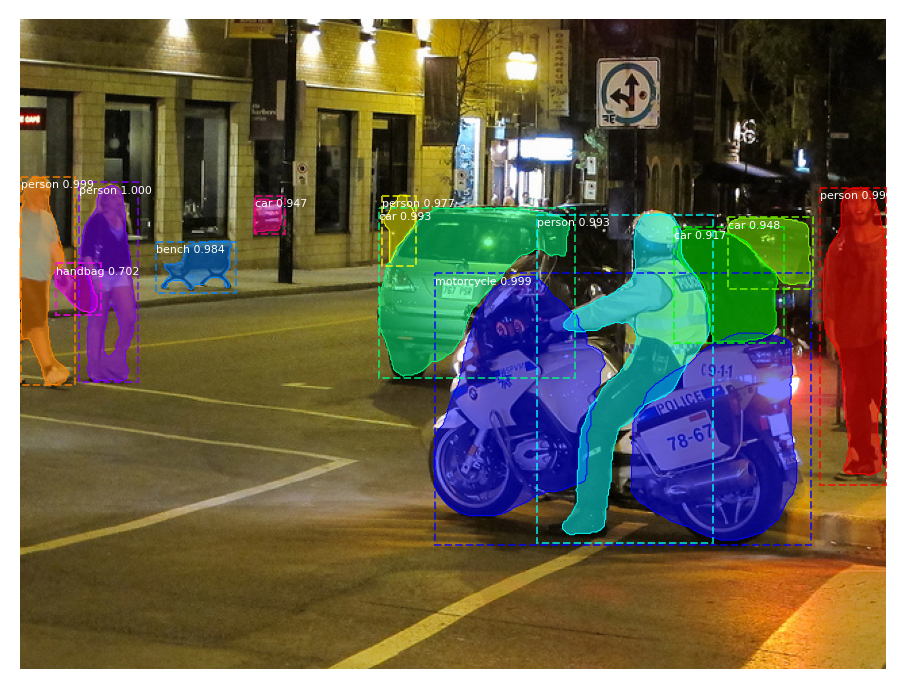

In [9]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

### 6) 사진 한장 올려 Object Detect 해 보자

Processing 1 images
image                    shape: (366, 600, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


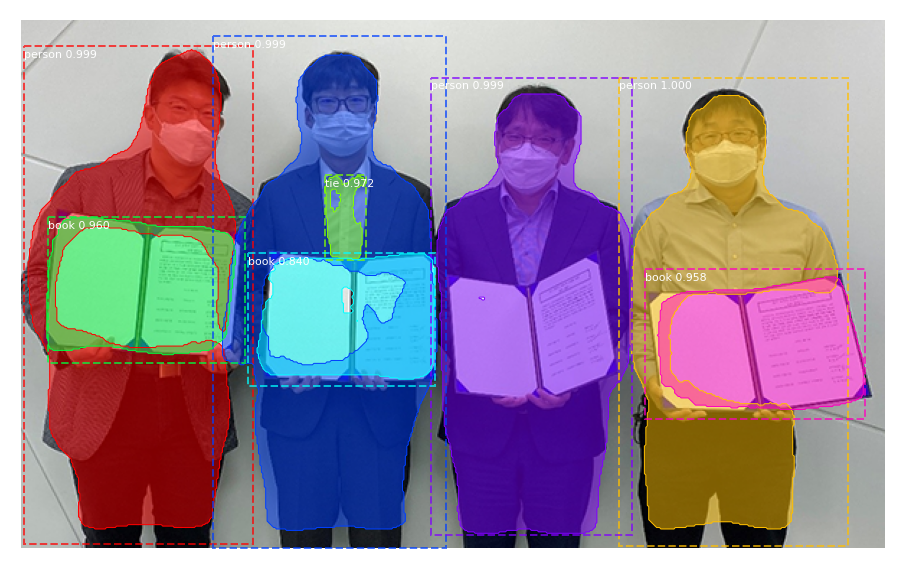

In [10]:
file_names = 'https://raw.githubusercontent.com/gzone2000/TEMP_TEST/master/person_picture.jpg'
image = skimage.io.imread(file_names)

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

### 7) 비디오 Obejct Detection 하기

In [11]:
# 비디오 Obejct Detection Python Code 다운로드
!wget https://raw.githubusercontent.com/gzone2000/TEMP_TEST/master/video_detection_PRO.py

--2022-02-04 00:16:33--  https://raw.githubusercontent.com/gzone2000/TEMP_TEST/master/video_detection_PRO.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5329 (5.2K) [text/plain]
Saving to: ‘video_detection_PRO.py’

video_detection_PRO 100%[===================>]   5.20K  --.-KB/s    in 0s      

2022-02-04 00:16:33 (72.1 MB/s) - ‘video_detection_PRO.py’ saved [5329/5329]



In [12]:
# 길거리 행인 비디오 다운로드
!wget https://github.com/gzone2000/TEMP_TEST/raw/master/TownCentreXVID_720p.mp4

--2022-02-04 00:16:33--  https://github.com/gzone2000/TEMP_TEST/raw/master/TownCentreXVID_720p.mp4
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gzone2000/TEMP_TEST/master/TownCentreXVID_720p.mp4 [following]
--2022-02-04 00:16:33--  https://raw.githubusercontent.com/gzone2000/TEMP_TEST/master/TownCentreXVID_720p.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1231243 (1.2M) [application/octet-stream]
Saving to: ‘TownCentreXVID_720p.mp4’

TownCentreXVID_720p 100%[===================>]   1.17M  --.-KB/s    in 0.05s   

2022-02-04 00:16:33 (22.2 MB/s) - ‘TownCentreXVID_720p.mp4’ saved [123124

In [13]:
# TownCentreXVID_720p.mp4 입력 비디오 파일 재생

from IPython.display import HTML 
from base64 import b64encode 

filename = 'TownCentreXVID_720p.mp4'
mp4 = open(filename,'rb').read() 
data_url = "data:video/mp4;base64," + b64encode(mp4).decode() 
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


In [14]:
# 비디오 파일 읽어 Object Detection 수행한 결과 저장

!!python ./video_detection_PRO.py --video_path TownCentreXVID_720p.mp4 --save_path pedestrian_detection.avi --show

['WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/resource_variable_ops.py:1666: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.',
 'Instructions for updating:',
 'If using Keras pass *_constraint arguments to layers.',
 '2022-02-04 00:16:43.120123: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1',
 '2022-02-04 00:16:43.126914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero',
 '2022-02-04 00:16:43.127372: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: ',
 'pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5',
 'coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryB

In [15]:
!apt update
!apt -y install ffmpeg

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InR

In [16]:
# colab에서는 mp4 재생되므로  avi --> mp4 변환

!ffmpeg -i pedestrian_detection.avi pedestrian_detection.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [17]:
# Object Detection 결과 저장된 pedestrian_detection.mp4 비디오 재생

filename = 'pedestrian_detection.mp4'
mp4 = open(filename,'rb').read() 
data_url = "data:video/mp4;base64," + b64encode(mp4).decode() 
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


# 비디오 용량이 클경우 아래 방식으로 해야 함. (안 할경우 colab Runtime Reset됨)
# !pip install -U kora
# from kora.drive import upload_public

# filename = 'pedestrian_detection.mp4'
# url = upload_public(filename)
# # then display it
# from IPython.display import HTML
# HTML(f"""<video src={url} width=500 controls/>""")

Output hidden; open in https://colab.research.google.com to view.

## 배운 내용 정리
1. Mask R-CNN Object Detetion에 대해 실습해 보았습니다.
2. 이미 코딩은 되어 있으니, 이를 활용하여 학습할 이미지셋을 만들고 모델을 구성한다면 새로운 Object를 Detection 할수도 있습니다.
3. 그리고, 기존 만들어진 Mask R-CNN을 가지고 실무에서 어떻게 적용할수 있는지 고민이 필요해 보입니다.